# Data Analysis

Capomulin and Ramicane were the two medication combinations that reduced tumor size the fastest out of the four we examined. The other two medications, Infubinol and Ceftamin, were the least efficient. 

There is a positive correlation between the weight of the mice and the tumor size. The P-Value of .84 indicates this linear correlation. 

The medicine is less effective the heavier the mouse. Because of the linear regression's strong r-value correlation (0.95), this conclusion can be trusted.

# Observations and Insights

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Checking the number of mice.
num_mice = len(data_df['Mouse ID'].unique())
num_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate =  data_df.loc[data_df["Mouse ID"] == "g989"]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [58]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_df[data_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [59]:
# Checking the number of mice in the clean DataFrame.
num_mice2 = len(clean_df['Mouse ID'].unique())
num_mice2

248

## Summary Statistics

In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimens_df = clean_study_df.groupby("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = round(regimens_df['Tumor Volume (mm3)'].mean(), 2)

median = round(regimens_df['Tumor Volume (mm3)'].median(), 2)

std = round(regimens_df['Tumor Volume (mm3)'].std(), 2)

var = round(regimens_df['Tumor Volume (mm3)'].var(),2)

sem = round(regimens_df['Tumor Volume (mm3)'].sem(ddof=0), 4)

# Create a new summary stats table dataframe for Tumor Volume
summary = {"Mean": meanTumor,
                "Median": medianTumor,
                "Var": varTumor,
                "Std": stdTumor,
                "SEM": semTumor}

summary_df = pd.DataFrame(summary)
summary_df.columns=pd.MultiIndex.from_product([['Tumor Volume Summary Stats'],summary_df.columns])
summary_df

Tumor Volume Summary Stats                            
                                   Mean Median    Var   Std     SEM
Drug Regimen                                                       
Capomulin                         40.68  41.56  24.95  4.99  0.3286
Ceftamin                          52.59  51.78  39.29  6.27  0.4685
Infubinol                         52.88  51.82  43.13  6.57  0.4909
Ketapril                          55.24  53.70  68.55  8.28  0.6023
Naftisol                          54.33  52.51  66.17  8.13  0.5949
Placebo                           54.03  52.29  61.17  7.82  0.5797
Propriva                          52.32  50.45  43.85  6.62  0.5425
Ramicane                          40.22  40.67  23.49  4.85  0.3202
Stelasyn                          54.23  52.43  59.45  7.71  0.5715
Zoniferol                         53.24  51.82  48.53  6.97  0.5150

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_df.groupby(clean_df["Drug Regimen"])['Tumor Volume (mm3)'].agg(["mean", 
                                               "median", 
                                               "var", 
                                               "std", 
                                               "sem"])
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [62]:
count_mice = pd.DataFrame(regimens_df['Drug Regimen'].count())
count_mice

,Drug Regimen
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


In [63]:
mice_count = data_df["Drug Regimen"].value_counts().reset_index()
mice_count.columns = ["Drug", "Count"]
mice_count

,Drug,Count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,161


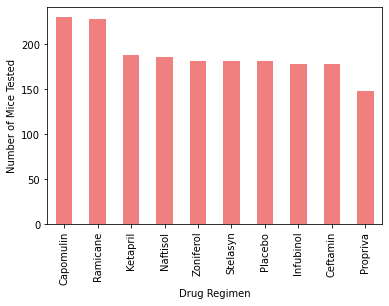

In [64]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts = clean_df['Drug Regimen'].value_counts()
counts.plot(kind="bar", color="lightcoral")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

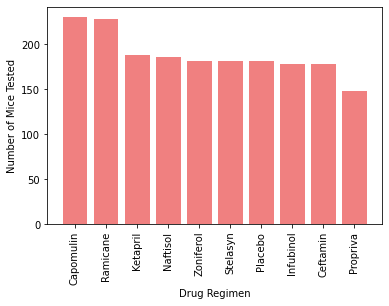

In [65]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = clean_df['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values, color="lightcoral")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

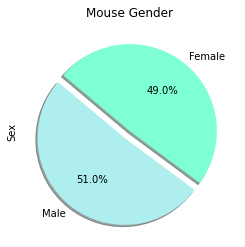

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = clean_df.Sex.value_counts()
counts.plot(kind="pie", autopct='%1.1f%%', shadow=True, startangle=140, explode = (0.1,0), colors = ["paleturquoise", "aquamarine"])
plt.title("Mouse Gender")
plt.show()

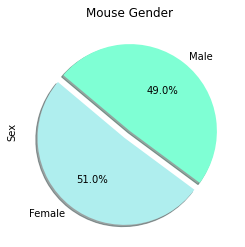

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the pie chart
labels = clean_df['Sex'].unique()

# The values of each section of the pie chart
sex = clean_df['Sex'].value_counts()

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sex, labels=labels, shadow=True, autopct="%1.1f%%", startangle=140, explode = (0.1,0), colors = ["paleturquoise", "aquamarine"])
plt.title("Mouse Gender")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [124]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = pd.DataFrame(data_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
last_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(data_df, last_timepoint, on='Mouse ID')
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),max_timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


In [127]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
data = []


# Create empty list to fill with tumor vol data (for plotting)
for drug in drugs:
    
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]
   
    last_vol = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
    
    values = last_vol['Tumor Volume (mm3)']
    data.append(values)
    
   # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = values.quantile([.25,.5,.75])
    lower_quartiles = quartiles[0.25]
    upper_quartiles = quartiles[0.75]
    iqr = upper_quartiles-lower_quartiles
    
    # Determine outliers using upper and lower bounds
    low_bound = lower_quartiles - (1.5*iqr)
    up_bound = upper_quartiles + (1.5*iqr)
    
    outliers = (values.loc[(last_vol['Tumor Volume (mm3)'] >= up_bound) | 
                                        (last_vol['Tumor Volume (mm3)'] <= low_bound)]).count()

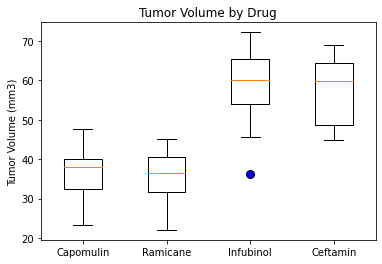

In [129]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

flierprops = dict(marker='o', markersize=8, markerfacecolor='b', markeredgecolor='black')

plt.boxplot(drug_values, flierprops=flierprops)

plt.title('Tumor Volume by Drug')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

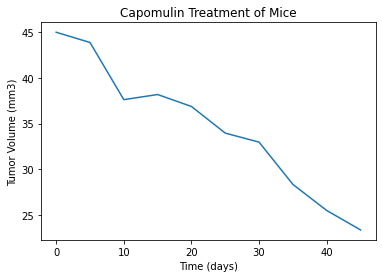

In [212]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Identify data points of a mouse treated with Capomulin
mice = data_df.loc[data_df['Mouse ID'] == "s185"]

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(mice['Timepoint'], mice['Tumor Volume (mm3)'])

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mice")

# Display plot
plt.show()

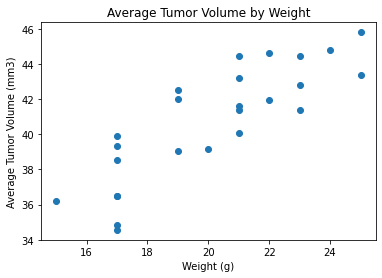

In [171]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_tumor_vol = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_tumor_vol = pd.merge(capomulin, avg_tumor_vol, on='Mouse ID')
last_avg_vol = avg_tumor_vol[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
last_avg_vol

x = last_avg_vol['Weight (g)']
y = last_avg_vol['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


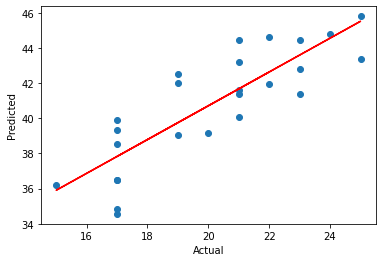

In [209]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

model = st.linregress(capomulin['Weight (g)'],capomulin['Tumor Volume (mm3)'])

# Find average tumor volume for each mouse

avg_tumor_vol = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_tumor_vol = pd.merge(capomulin, avg_tumor_vol, on='Mouse ID')
last_avg_vol = avg_tumor_vol[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
last_avg_vol

x = last_avg_vol['Weight (g)']
y_values = capomulin['Weight (g)']*model[0]+model[1]

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Actual")
plt.ylabel("Predicted")
# plt.title('Average Tumor Volume by Weight')
plt.plot(capomulin['Weight (g)'],y_values,color="red")
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")